# 📊 Statistical Study: Population vs. Sample

* **Author:** Socrates Gomes
* **Objective:** Simulate employee salary data to understand the difference between analyzing the full dataset (Population) and a small part of it (Sample).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility (keeps random numbers the same every time)
np.random.seed(42)

# 1. CREATING COMPANY DATA (POPULATION)
total_employees = 1000

# Creating simple lists for data
ids = range(1, total_employees + 1)

# Departments: IT, HR, Sales, Engineering
departments = np.random.choice(['IT', 'HR', 'Sales', 'Engineering'], total_employees)

# Years of experience (1 to 20 years)
experience = np.random.randint(1, 20, total_employees)

# Creating the DataFrame (Table)
df = pd.DataFrame({
    'Employee_ID': ids,
    'Department': departments,
    'Years_Experience': experience
})

# 2. DEFINING SALARIES
# Logic: Base Salary (3000) + (500 per year of experience)
df['Salary'] = 3000 + (df['Years_Experience'] * 500)

# Giving a bonus to Engineering department (to create variety)
# If department is Engineering, add +2000
df.loc[df['Department'] == 'Engineering', 'Salary'] += 2000

# Show first 5 rows to check
display(df.head())

,Employee_ID,Department,Years_Experience,Salary
0,1,Sales,17,11500
1,2,Engineering,9,9500
2,3,IT,1,3500
3,4,Sales,13,9500
4,5,Sales,16,11000


## 🔎 Exploratory Data Analysis (EDA)
Before sampling, let's look at the "Truth" (The Population).
We will calculate the **Real Mean Salary** of the entire company.

--- POPULATION DATA (THE TRUTH) ---
Real Mean Salary:   $8552.00
Standard Deviation: $2881.42


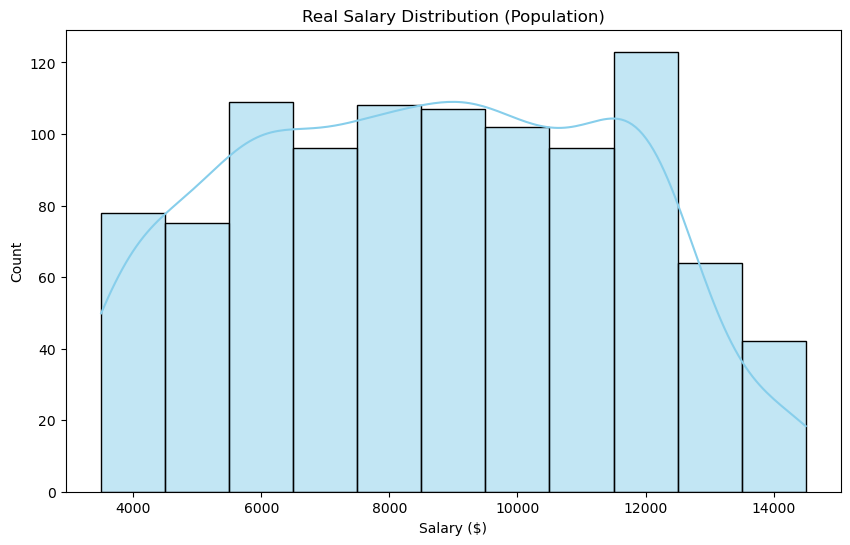

In [7]:
# Descriptive Statistics (Population)
real_mean = df['Salary'].mean()
std_dev = df['Salary'].std()

print(f"--- POPULATION DATA (THE TRUTH) ---")
print(f"Real Mean Salary:   ${real_mean:.2f}")
print(f"Standard Deviation: ${std_dev:.2f}")

# Visualizing the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salary', kde=True, color='skyblue')
plt.title("Real Salary Distribution (Population)")
plt.xlabel("Salary ($)")
plt.show()

## 🎲 The Sampling Test
Imagine we cannot interview all 1000 employees. Let's pick **100 people** randomly (10% of the company) and see if the average matches the reality.

In [8]:
# Picking 100 random rows (Simple Random Sampling)
sample = df.sample(n=100, random_state=42)

# Calculating statistics for the sample
sample_mean = sample['Salary'].mean()

# Calculating the Error (Difference between Sample and Reality)
error = real_mean - sample_mean

print(f"--- SAMPLE RESULT (100 PEOPLE) ---")
print(f"Sample Mean:       ${sample_mean:.2f}")
print(f"Real Mean:         ${real_mean:.2f}")
print(f"Difference (Error): ${error:.2f}")

--- SAMPLE RESULT (100 PEOPLE) ---
Sample Mean:       $8800.00
Real Mean:         $8552.00
Difference (Error): $-248.00


### 🚀 Conclusion
The test showed that by selecting only 100 employees randomly, we obtained a mean salary very close to the real one, with a small error margin. This validates the use of statistical sampling for large datasets.

## 🆚 Challenge: Stratified Sampling
As we saw, different departments have different salary ranges (Engineering earns more).
If we use **Simple Random Sampling**, we might accidentally pick too few engineers, making our estimate wrong.

**Stratified Sampling** guarantees we pick a proportional amount of employees from each department (e.g., 10% of IT, 10% of Engineering, etc.).

In [16]:
# Technique B: Stratified Sampling
# Fix: Added include_groups=False to prevent the Pandas warning
sample_stratified = df.groupby('Department', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42), include_groups=False)

# Calculating stats
mean_stratified = sample_stratified['Salary'].mean()
error_stratified = real_mean - mean_stratified

print(f"--- COMPARISON ---")
print(f"Real Mean:              ${real_mean:.2f}")
print(f"Simple Sample Mean:     ${sample_mean:.2f} (Error: ${error:.2f})")
print(f"Stratified Sample Mean: ${mean_stratified:.2f} (Error: ${error_stratified:.2f})")

# Logic to determine the conclusion automatically
if abs(error_stratified) < abs(error):
    print("\n✅ Conclusion: Stratified Sampling was MORE accurate!")
else:
    print("\n⚠️ Conclusion: Stratified Sampling was NOT better this time.")
    print("   Why? Even with representative groups, random selection within groups can still vary.")

--- COMPARISON ---
Real Mean:              $8552.00
Simple Sample Mean:     $8800.00 (Error: $-248.00)
Stratified Sample Mean: $8210.00 (Error: $342.00)

⚠️ Conclusion: Stratified Sampling was NOT better this time.
   Why? Even with representative groups, random selection within groups can still vary.


In [18]:
# --- AUDITING THE SAMPLE ---
# Fix: Since 'Department' might be missing from the sample variable due to groupby,
# we use the indices (.index) to look up the original values in the main dataframe (df).

print("📋 Sample Composition (Stratified):")
# "df.loc" means: Look inside the original DF using these specific IDs
print(df.loc[sample_stratified.index, 'Department'].value_counts())

print(f"\nTotal sample size: {len(sample_stratified)}")

📋 Sample Composition (Stratified):
Department
Engineering    28
IT             26
HR             23
Sales          23
Name: count, dtype: int64

Total sample size: 100


### 🕵️‍♂️ Audit Result
By looking at the counts above, we can confirm that **Stratified Sampling** respected the department proportions.
* Unlike simple random sampling (which is blind to categories), this method ensured every department was represented according to its size in the company.